### COVID-19 Dataset Base Models
##### Here, I took a sample of the data and ran three different models, testing precision and f1-score for each. These models are K-Nearest Neighbors, Random Forest and Logistic Regression.

#### Content:
##### 1) Importing Packages
##### 2) Reading Into Data
##### 3) Train Test Splitting
##### 4) Min Max Scaling
##### 5) Random Under-Sampling
##### 6) Necessary Functions
##### 7) K-Nearest Neighbors
##### 8) Random Forest
##### 9) Logistic Regression
##### 10) Summary

### 1) Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.under_sampling import RandomUnderSampler

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

### 2) Reading into data

In [3]:
df = pd.read_csv('COVID_Clean_Data_OHE.csv')

In [4]:
df.head()

,Unnamed: 0,USMER,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,...,MEDICAL_UNIT_5,MEDICAL_UNIT_6,MEDICAL_UNIT_7,MEDICAL_UNIT_8,MEDICAL_UNIT_9,MEDICAL_UNIT_10,MEDICAL_UNIT_11,MEDICAL_UNIT_12,MEDICAL_UNIT_13,DEATH
0,0,2,1,1,1,65,2,2,2,2,...,0,0,0,0,0,0,0,0,0,1
1,1,2,2,1,1,72,2,2,2,2,...,0,0,0,0,0,0,0,0,0,1
2,2,2,2,2,2,55,2,1,2,2,...,0,0,0,0,0,0,0,0,0,1
3,3,2,1,1,2,53,2,2,2,2,...,0,0,0,0,0,0,0,0,0,1
4,4,2,2,1,2,68,2,1,2,2,...,0,0,0,0,0,0,0,0,0,1


In [5]:
df.drop(columns='Unnamed: 0',inplace=True)
df.columns

Index(['USMER', 'SEX', 'PATIENT_TYPE', 'PNEUMONIA', 'AGE', 'PREGNANT',
       'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'CLASIFFICATION_FINAL_1', 'CLASIFFICATION_FINAL_2',
       'CLASIFFICATION_FINAL_3', 'CLASIFFICATION_FINAL_4',
       'CLASIFFICATION_FINAL_5', 'CLASIFFICATION_FINAL_6',
       'CLASIFFICATION_FINAL_7', 'MEDICAL_UNIT_1', 'MEDICAL_UNIT_2',
       'MEDICAL_UNIT_3', 'MEDICAL_UNIT_4', 'MEDICAL_UNIT_5', 'MEDICAL_UNIT_6',
       'MEDICAL_UNIT_7', 'MEDICAL_UNIT_8', 'MEDICAL_UNIT_9', 'MEDICAL_UNIT_10',
       'MEDICAL_UNIT_11', 'MEDICAL_UNIT_12', 'MEDICAL_UNIT_13', 'DEATH'],
      dtype='object')

In [6]:
df = df.sample(n=4000,random_state=42)

### 3) Train Test Splitting

In [7]:
features = ['USMER', 'SEX', 'PATIENT_TYPE', 'PNEUMONIA', 'AGE', 'PREGNANT',
            'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
            'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
            'TOBACCO', 'CLASIFFICATION_FINAL_1', 'CLASIFFICATION_FINAL_2',
            'CLASIFFICATION_FINAL_3', 'CLASIFFICATION_FINAL_4',
            'CLASIFFICATION_FINAL_5', 'CLASIFFICATION_FINAL_6',
            'CLASIFFICATION_FINAL_7', 'MEDICAL_UNIT_1', 'MEDICAL_UNIT_2',
            'MEDICAL_UNIT_3', 'MEDICAL_UNIT_4', 'MEDICAL_UNIT_5', 'MEDICAL_UNIT_6',
            'MEDICAL_UNIT_7', 'MEDICAL_UNIT_8', 'MEDICAL_UNIT_9', 'MEDICAL_UNIT_10',
            'MEDICAL_UNIT_11', 'MEDICAL_UNIT_12', 'MEDICAL_UNIT_13']
X = df[features]
y = df['DEATH']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
### Stratify y to get equal distribution of 'DEATH' values in train and test

In [9]:
for x in [X_train,y_train,X_test,y_test]:
    print(x.shape)

(3200, 36)
(3200,)
(800, 36)
(800,)


### 4) MinMax Scaling
##### Decided to MinMax scale for Logistic regression and K-Nearest Neighbors so that the variables are weighted fairly when fitting. Later on for logistic regression z-score standard scaling will be used.

In [10]:
def scaling(train,test,scaler_class):
    """Standardizing/scaling the data. Assumes all columns need to be scaled."""
    cols = train.columns
    scaler = scaler_class

    index_train = train.index
    train = scaler.fit_transform(train)
    train = pd.DataFrame(train, columns=cols,index=index_train)

    index_test = test.index
    test = scaler.transform(test)
    test = pd.DataFrame(test,columns=cols,index=index_test)

    return train, test

In [11]:
X_train_mm, X_test_mm = scaling(train=X_train,test=X_test,scaler_class=MinMaxScaler())

In [ ]:
#X_train_ss, X_test_ss = scaling(train=X_train,test=X_test,scaler_class=StandardScaler())

### 5) Random under-sampling
##### For the base models I will under-sample to deal with the class imbalance, further along the line SMOTE and the combination of SMOTE and under-sampling will be tested.

In [12]:
under = RandomUnderSampler(sampling_strategy=1,random_state=42)### we want the majority to reduce till it is the size of the minority

In [13]:
X_train_mm_u,y_train_u = under.fit_resample(X_train_mm,y_train)

In [14]:
y_train_u.value_counts()

0    222
1    222
Name: DEATH, dtype: int64

### 6) Necessary functions
##### Defining a few functions that will be necessary for this quick analysis.

In [29]:
def drop(X):
    '''Drops certain columns that are commonly created for train and test data by virtue of predicting.'''
    for i in ['DEATH','prob_survive','prob_die','y_pred']:
        try:
            X.drop(columns=i,inplace=True)
        except KeyError:
            print(f'Column {i} doesn\'t exist')
            continue

In [ ]:
def cutoff_iterator(X, y, iterations, accuracy=[], precision=[], f1_score=[]):
    """Works through many cutoff points and outputs precision and recall scores.
    Requires sklearn metrics package."""
    for i in iterations:
        X['y_pred'] = np.where(X['prob_die'] > i, 1, 0)
        accuracy.append(metrics.accuracy_score(y, X['y_pred']))
        precision.append(metrics.precision_score(y, X['y_pred']))
        f1_score.append(metrics.f1_score(y, X['y_pred']))
    dict_2 = {'Cut_Off_Points': iterations,
              'Accuracy': accuracy,
              'Precision': precision,
              'F1': f1_score}
    metrics_table = pd.DataFrame(dict_2)
    return metrics_table

In [ ]:
def grid_search(param_dict,classifier_object,folds,X,y):
    """Grid search finding the best parameters. Requires gridsearch package."""
    gs = GridSearchCV(classifier_object, param_grid=param_dict, cv=folds, scoring=['precision','f1'], refit='precision')
    gs.fit(X,y)
    print(gs.best_score_)
    print(gs.best_params_)
### N.B. Grid search will only be used for random forest model as there are many hyper-parameters that need to be tuned.

### 7) K-Nearest Neighbors

In [15]:
def KNN_select(X,y):
    errors = []
    for i in range(2,15):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X,y)
        pred_y = knn.predict(X)
        errors.append(np.mean(pred_y != y))

    ##Plotting to select
    plt.figure(figsize=(12, 6))
    plt.plot(range(2,15)
         , errors
         , color='RED'
         , linestyle='dashed'
         , marker='o'
         , markerfacecolor='blue'
         , markersize=10)
    plt.title('Error Rate K Value')
    plt.xlabel('K Value')
    plt.ylabel('Mean Error')
    plt.show()

C:\Users\Jan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Jan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` t

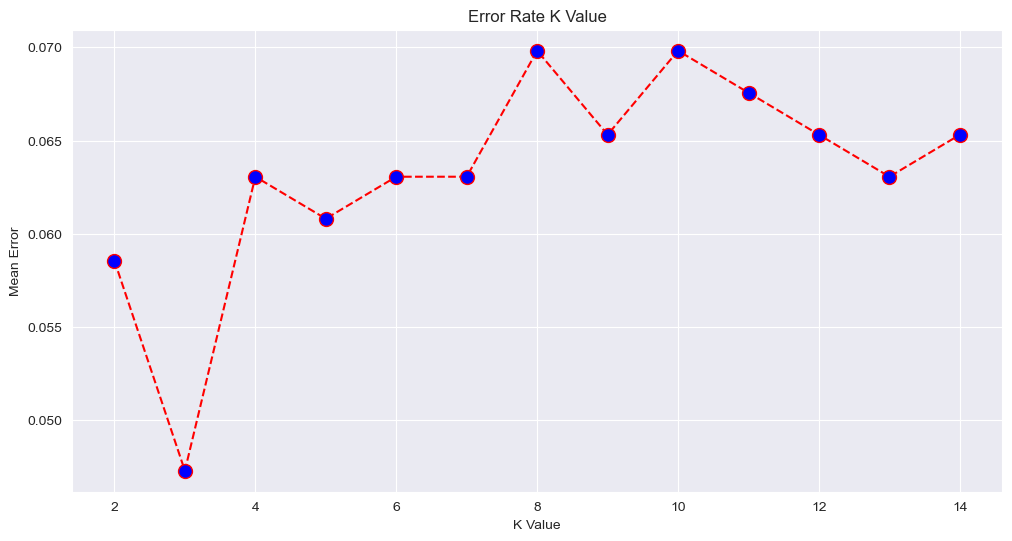

In [16]:
KNN_select(X_train_mm_u,y_train_u)

##### Smallest error is at k=3

#### KNN Best Model

In [17]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_mm_u,y_train_u)
#pred_y = knn.predict(X_train_mm_u)

KNeighborsClassifier(n_neighbors=3)

In [18]:
#### Use predict proba to select best cut_off point
X_train_mm_u[['prob_survive', 'prob_die']] = knn.predict_proba(X_train_mm_u)

##### The cut_off iterator

In [20]:
iterations = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85,
              0.90, 0.95]
cutoff_iterator(X=X_train_mm_u, y=y_train_u, iterations=iterations)

,Cut_Off_Points,Accuracy,Precision,F1
0,0.05,0.943694,0.898785,0.946695
1,0.10,0.943694,0.898785,0.946695
2,0.15,0.943694,0.898785,0.946695
3,0.20,0.943694,0.898785,0.946695
4,0.25,0.943694,0.898785,0.946695
5,0.30,0.943694,0.898785,0.946695
6,0.35,0.952703,0.935065,0.953642
7,0.40,0.952703,0.935065,0.953642
8,0.45,0.952703,0.935065,0.953642
9,0.50,0.952703,0.935065,0.953642


In [21]:
X_test_mm[['prob_survive', 'prob_die']] = knn.predict_proba(X_test_mm)
X_test_mm['y_pred'] = np.where(X_test_mm['prob_die']>0.70, 1, 0)

In [22]:
print('Precision: ',metrics.precision_score(y_test,X_test_mm['y_pred']))
print('f1_score: ',metrics.f1_score(y_test,X_test_mm['y_pred']))

Precision:  0.4574468085106383
f1_score:  0.5771812080536913


##### KNN model is not looking very promising, huge drop-off between train and test data for precision and f1_scores.

### 8) Random Forests
##### Under-sampling the raw X_train and y_train data. No scaling is needed when using Random Forest.

In [53]:
under = RandomUnderSampler(sampling_strategy=1,
                           random_state=42)  ### we want the majority to reduce till it is the size of the minority
X_train_u_rf, y_train_u_rf = under.fit_resample(X_train, y_train)
y_train_u_rf.value_counts()

0    222
1    222
Name: DEATH, dtype: int64

In [25]:
param_dict = {'n_estimators':[75,100,125],
              'max_depth':[5,6,7,8],
              'min_samples_split':[2,3,4],
              'min_samples_leaf':[1,2,3]}
grid_search(param_dict=param_dict,classifier_object=RandomForestClassifier(random_state=42),folds=10,X=X_train_u_rf,y=y_train_u_rf)

0.9156872909698996
{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [26]:
rf = RandomForestClassifier(max_depth=5, n_estimators=100,min_samples_leaf=2,min_samples_split=2,random_state=42)
rf.fit(X_train_u_rf, y_train_u_rf)

RandomForestClassifier(max_depth=5, min_samples_leaf=2, random_state=42)

In [55]:
drop(X_train_u_rf)

Column DEATH doesn't exist
Column prob_survive doesn't exist
Column prob_die doesn't exist
Column y_pred doesn't exist


In [56]:
#### use predict proba to select best cut_off points
X_train_u_rf[['prob_survive', 'prob_die']] = rf.predict_proba(X_train_u_rf)

In [57]:
iterations = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85,
              0.90, 0.95]
cutoff_iterator(X=X_train_u_rf, y=y_train_u_rf, iterations=iterations, accuracy=[], precision=[], f1_score=[])

,Cut_Off_Points,Accuracy,Precision,F1
0,0.05,0.594595,0.552239,0.711538
1,0.10,0.786036,0.700315,0.823748
2,0.15,0.887387,0.816176,0.898785
3,0.20,0.912162,0.850575,0.919255
4,0.25,0.934685,0.887550,0.938429
5,0.30,0.943694,0.902041,0.946467
6,0.35,0.943694,0.902041,0.946467
7,0.40,0.945946,0.905738,0.948498
8,0.45,0.945946,0.909091,0.948276
9,0.50,0.943694,0.908714,0.946004


In [59]:
drop(X_test)

Column DEATH doesn't exist


In [60]:
X_test[['prob_survive', 'prob_die']] = rf.predict_proba(X_test)
X_test['y_pred'] = np.where(X_test['prob_die'] > 0.85, 1, 0)

In [61]:
print('Precision: ', metrics.precision_score(y_test, X_test['y_pred']))
print('f1_score: ', metrics.f1_score(y_test, X_test['y_pred']))

Precision:  0.574468085106383
f1_score:  0.5294117647058822


### 9) Logistic Regression

In [62]:
drop(X_train_mm_u)

Column DEATH doesn't exist


In [63]:
lr = LogisticRegression(max_iter=75,random_state=42)

In [64]:
lr.fit(X_train_mm_u,y_train_u)

LogisticRegression(max_iter=75, random_state=42)

In [65]:
X_train_mm_u[['prob_survive', 'prob_die']] = lr.predict_proba(X_train_mm_u)

In [66]:
iterations = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85,
              0.90, 0.95]
cutoff_iterator(X=X_train_mm_u, y=y_train_u, iterations=iterations, accuracy=[], precision=[], f1_score=[])

,Cut_Off_Points,Accuracy,Precision,F1
0,0.05,0.844595,0.762887,0.865497
1,0.10,0.912162,0.853282,0.918919
2,0.15,0.925676,0.873518,0.930526
3,0.20,0.934685,0.890688,0.938166
4,0.25,0.941441,0.901639,0.944206
5,0.30,0.948198,0.912863,0.950324
6,0.35,0.945946,0.912500,0.948052
7,0.40,0.948198,0.919831,0.949891
8,0.45,0.948198,0.923404,0.949672
9,0.50,0.943694,0.930131,0.944568


In [67]:
drop(X_test_mm)

Column DEATH doesn't exist


In [68]:
X_test_mm[['prob_survive', 'prob_die']] = lr.predict_proba(X_test_mm)
X_test_mm['y_pred'] = np.where(X_test_mm['prob_die']>0.90, 1, 0)

In [69]:
metrics.precision_score(y_test,X_test_mm['y_pred'])

0.4696969696969697

In [70]:
metrics.f1_score(y_test,X_test_mm['y_pred'])

0.5123966942148761

### 10) Summary
##### Out of these three models the Random Forest model did the best in terms of achieving the best precision and f1 scores on the test data, logistic regression took second place. However, all of the above models suffered from significant over-fitting. For the other notebooks, I will experiment thoroughly with Random Forest and Logistic Regression models only.